# Домащнее задание №3

**По данным о задержках вылетов определить:**

1. Долю всех задержек ко всем вылетам
2. Зависимость количества задержек от длины пути, который предстоит пролететь самолету
3. Топ 5 направлений, для которых чаще всего происходят задержки
4. В какие времена года чаще всего происходят задержки рейсов
5. Топ 10 самых хороших перевозчиков, которые реще всего задерживают свои рейсы
6. Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки
7. Необычную зависимость количества задержек от имеющихся данных

### Проведём первичный анализ данных

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#help(pd.read_csv)
path_to_file = 'flight_delays.csv'
data = pd.read_csv(path_to_file, sep=',')

print(data.shape)
#df.tail()
data.head()

(100000, 9)


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [40]:
#1 - доля задержек ко всем вылетам
print(str(len(data[data['dep_delayed_15min'] == 'Y']) / len(data) * 100) + "% - доля задержек по всем вылетам")

19.044% - доля задержек по всем вылетам


In [41]:
# Далее будет исследование отлоденных вылетов, оставим только их в рассмотрении
df_delayed = data[data['dep_delayed_15min'] == 'Y']
df_delayed

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
18,c-10,c-14,c-5,1704,OO,SLC,SEA,689,Y
21,c-6,c-21,c-3,1519,EV,ATL,ILM,377,Y
33,c-12,c-3,c-7,1653,EV,ATL,MYR,317,Y
35,c-3,c-24,c-4,2303,US,CLT,CHS,168,Y
...,...,...,...,...,...,...,...,...,...
99971,c-7,c-31,c-1,2027,DL,ATL,SJC,2116,Y
99976,c-5,c-20,c-5,2117,MQ,LGA,BGR,378,Y
99980,c-4,c-28,c-4,2222,XE,EWR,DAB,884,Y
99989,c-4,c-11,c-1,1730,WN,JAN,BWI,888,Y


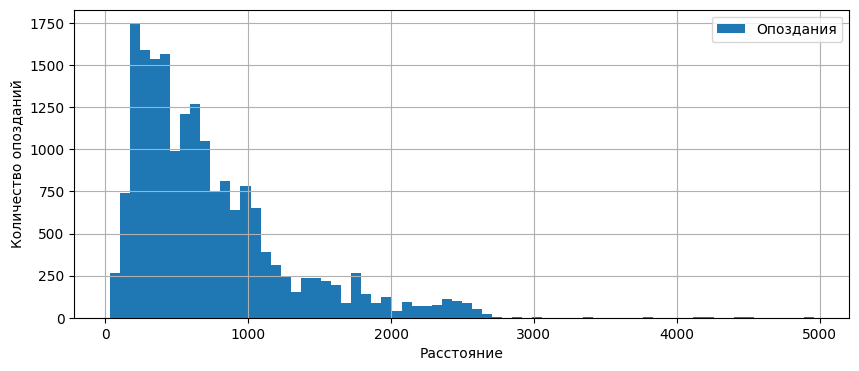

In [42]:
#2 - зависимость количества задержек от длины
df_delayed['Distance'].hist(figsize=(10, 4), bins=70, label='Опоздания')
plt.xlabel('Расстояние')
plt.ylabel('Количество опозданий')
plt.legend()

In [43]:
#3 - топ 5 направлений, для которых чаще всего происходят задержки
by_route = df_delayed.groupby('Dest')

In [44]:
by_route.dep_delayed_15min.count().sort_values().tail(5)

Dest
LAX     525
EWR     584
DFW     656
ORD    1072
ATL    1281
Name: dep_delayed_15min, dtype: int64

In [45]:
#4 - в какие времена года чаще всего происходят задержки рейсов

Для начала аннотируем наши данные, прикрепив к каждому рейсу информацию о том, в какое время года она произошёл:

In [46]:
Seasons = {
    'c-1' : 'Winter',
    'c-2' : 'Winter',
    
    'c-3' : 'Spring',
    'c-4' : 'Spring',
    'c-5' : 'Spring',
    
    'c-6' : 'Summer',
    'c-7' : 'Summer',
    'c-8' : 'Summer',
    
    'c-9' : 'Autumn',
    'c-10' : 'Autumn',
    'c-11' : 'Autumn',
    
    'c-12' : 'Winter',
    
}

In [47]:
for month in Seasons.keys():
    df_delayed.loc[(data['Month'] == month), "Season"] = Seasons[month]
display(df_delayed)
df_delayed.groupby('Season').dep_delayed_15min.count()

/var/folders/ry/v7qkn0wd1qx5gk770cjh08s00000gn/T/ipykernel_29133/3943739007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delayed.loc[(data['Month'] == month), "Season"] = Seasons[month]


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,Season
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,Autumn
18,c-10,c-14,c-5,1704,OO,SLC,SEA,689,Y,Autumn
21,c-6,c-21,c-3,1519,EV,ATL,ILM,377,Y,Summer
33,c-12,c-3,c-7,1653,EV,ATL,MYR,317,Y,Winter
35,c-3,c-24,c-4,2303,US,CLT,CHS,168,Y,Spring
...,...,...,...,...,...,...,...,...,...,...
99971,c-7,c-31,c-1,2027,DL,ATL,SJC,2116,Y,Summer
99976,c-5,c-20,c-5,2117,MQ,LGA,BGR,378,Y,Spring
99980,c-4,c-28,c-4,2222,XE,EWR,DAB,884,Y,Spring
99989,c-4,c-11,c-1,1730,WN,JAN,BWI,888,Y,Spring


Season
Autumn    4177
Spring    4295
Summer    5723
Winter    4849
Name: dep_delayed_15min, dtype: int64

Таким образом можно замтеить, что задержки чаще всего случаются летом.

In [49]:
#5 - топ 10 самых хороших перевозчиков, которые реще всего задерживают свои рейсы
df_delayed.groupby('UniqueCarrier').dep_delayed_15min.count().sort_values().tail(10)

UniqueCarrier
XE    1026
NW    1075
EV    1082
US    1085
OO    1277
UA    1322
DL    1373
MQ    1448
AA    1770
WN    3219
Name: dep_delayed_15min, dtype: int64

In [50]:
#6 - топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки
df_delayed.groupby('Origin').dep_delayed_15min.count().sort_values().tail(10)

Origin
DTW     401
PHX     491
IAH     492
EWR     538
LAS     546
LAX     552
DEN     575
DFW     902
ORD    1254
ATL    1506
Name: dep_delayed_15min, dtype: int64

In [55]:
#7 - необычная зависимость количества задержек от имеющихся данных

WeekDays = {
    'c-1' : 'Sunday',
    'c-2' : 'Monday',
    
    'c-3' : 'Tuesday',
    'c-4' : 'Wednesday',
    'c-5' : 'Thursday',
    
    'c-6' : 'Friday',
    'c-7' : 'Saturday',
}

for day in WeekDays.keys():
    df_delayed.loc[(data['DayOfWeek'] == day), "WeekDay"] = WeekDays[day]
display(df_delayed)
df_delayed.groupby('WeekDay').dep_delayed_15min.count()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,Season,WeekDay
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,Autumn,Friday
18,c-10,c-14,c-5,1704,OO,SLC,SEA,689,Y,Autumn,Thursday
21,c-6,c-21,c-3,1519,EV,ATL,ILM,377,Y,Summer,Tuesday
33,c-12,c-3,c-7,1653,EV,ATL,MYR,317,Y,Winter,Saturday
35,c-3,c-24,c-4,2303,US,CLT,CHS,168,Y,Spring,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
99971,c-7,c-31,c-1,2027,DL,ATL,SJC,2116,Y,Summer,Sunday
99976,c-5,c-20,c-5,2117,MQ,LGA,BGR,378,Y,Spring,Thursday
99980,c-4,c-28,c-4,2222,XE,EWR,DAB,884,Y,Spring,Wednesday
99989,c-4,c-11,c-1,1730,WN,JAN,BWI,888,Y,Spring,Sunday


WeekDay
Friday       2145
Monday       2451
Saturday     2705
Sunday       2774
Thursday     3285
Tuesday      2567
Wednesday    3117
Name: dep_delayed_15min, dtype: int64

Необычный факт - задержки в вылетах в и среду четверг случаются чаще, чем в остальные дни.